In [1]:
import tensorflow as tf 
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

2024-02-08 22:40:43.217272: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-08 22:40:43.262778: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-08 22:40:43.262808: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-08 22:40:43.263742: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-08 22:40:43.269985: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-08 22:40:43.270398: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
df = pd.read_csv("Bayern_Munich_23-2024_Squad_Images_data.csv")
df.sample(5)

,player_name,label,0,1,2,3,4,5,6,7,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
91,Leon_Goretzka,0,123.0,100.0,107.0,122.0,100.0,105.0,113.0,96.0,...,137.0,191.0,218.0,24.0,20.0,35.0,37.0,64.0,143.0,1.0
612,Sacha_Boey,8,23.0,22.0,21.0,24.0,26.0,26.0,39.0,42.0,...,2.0,0.0,0.0,1.0,254.0,149.0,254.0,3.0,4.0,9.0
2801,Harry_Kane,14,116.0,137.0,164.0,133.0,157.0,191.0,85.0,111.0,...,96.0,29.0,230.0,207.0,180.0,175.0,44.0,0.0,2.0,0.0
1118,Jamal_Musiala,16,31.0,40.0,49.0,35.0,40.0,45.0,29.0,33.0,...,249.0,246.0,244.0,243.0,242.0,238.0,228.0,232.0,241.0,250.0
372,Bouna_Sarr,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,106.0,11.0,17.0,14.0,27.0,208.0,217.0,217.0,217.0,7.0


In [3]:
# Get unique player names
unique_players = df['player_name'].unique()

player_label_dict = {}

for player in unique_players:
    labels_for_player = df.loc[df['player_name'] == player, 'label'].unique()
    player_label_dict[player] = labels_for_player[0]

print(player_label_dict)

{'Leon_Goretzka': 0, 'Bryan_Zaragoza': 1, 'Raphael_Guerrerio': 2, 'Serge_Gnabry': 3, 'Bouna_Sarr': 4, 'Alphonso_Davies': 5, 'Dayot_Upamechano': 6, 'Noussair_Mazraoui': 7, 'Sacha_Boey': 8, 'Minjae_Kim': 9, 'Leroy_Sane': 10, 'Thomas_Muller': 11, 'Eric_Dier': 12, 'Joshua_Kimmich': 13, 'Harry_Kane': 14, 'Kingsley_Coman': 15, 'Jamal_Musiala': 16, 'Tarek_Buchmann': 17, 'Daniel_Peretz': 18, 'Manuel_Neuer': 19, 'Aleksandar_Pavlovic': 20, 'Mathys_Tel': 21, 'Konrad_Laimer': 22, 'Matthijs_De_Ligt': 23, 'Eric_Maxim_Choupo_Moting': 24, 'Sven_Ulreich': 25}


In [4]:
X = df.drop(['player_name', 'label'], axis="columns")
y = df['label']

X = X / 255 # Maximum number is 255

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(4096,), activation="relu"),
    keras.layers.Dense(26, activation="sigmoid")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
92/92 [==============================] - 1s 4ms/step - loss: 3.1679 - accuracy: 0.1012
Epoch 2/100
92/92 [==============================] - 0s 5ms/step - loss: 2.8091 - accuracy: 0.1834
Epoch 3/100
92/92 [==============================] - 0s 4ms/step - loss: 2.4858 - accuracy: 0.3077
Epoch 4/100
92/92 [==============================] - 0s 5ms/step - loss: 2.1831 - accuracy: 0.4052
Epoch 5/100
92/92 [==============================] - 0s 5ms/step - loss: 1.9567 - accuracy: 0.4745
Epoch 6/100
92/92 [==============================] - 0s 5ms/step - loss: 1.7567 - accuracy: 0.5319
Epoch 7/100
92/92 [==============================] - 0s 5ms/step - loss: 1.6047 - accuracy: 0.5713
Epoch 8/100
92/92 [==============================] - 0s 4ms/step - loss: 1.4746 - accuracy: 0.6196
Epoch 9/100
92/92 [==============================] - 0s 5ms/step - loss: 1.3430 - accuracy: 0.6661
Epoch 10/100
92/92 [==============================] - 0s 5ms/step - loss: 1.2391 - accuracy: 0.6994
Epoch 11/

In [7]:
# Evaluate this model
model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 2ms/step - loss: 0.7095 - accuracy: 0.9158


[0.7094696164131165, 0.91576087474823]

# Confusion Matrix

In [8]:
y_pred = model.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

23/23 [==============================] - 0s 2ms/step


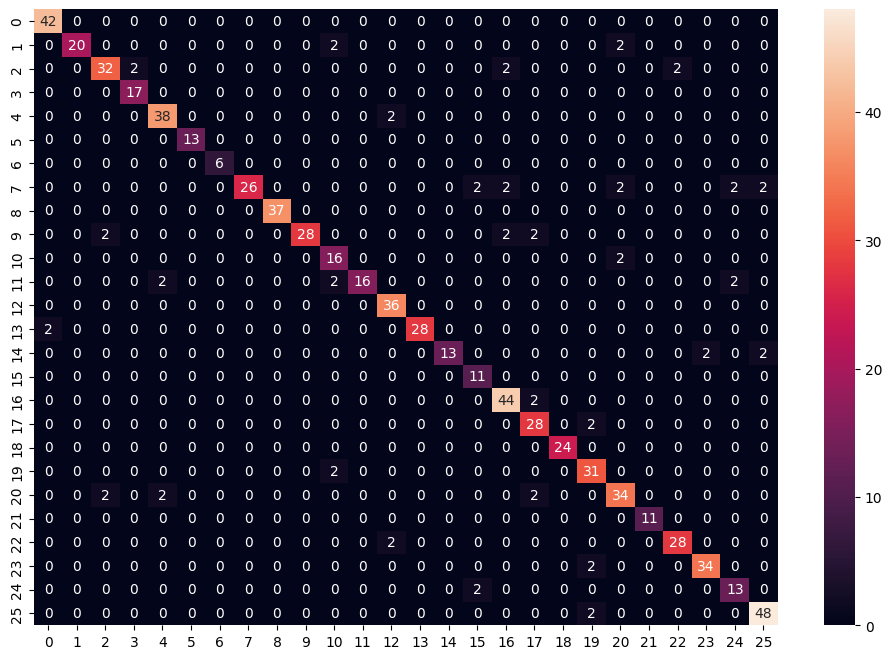

In [9]:
# Confusion Matrix
plt.figure(figsize=(12, 8))
cm = tf.math.confusion_matrix(labels=y_test, predictions= y_pred_labels)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()